In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
F = open('termvectors_sampling_5topics.txt','r')
#F = open('termvectors_sampling.txt','r')
all_tv=[]
for lines in F:
    try:
        if (lines[2]=='[' and lines[3]=='u'):
            T=lines.split(', ')
            T[0]= T[0][4:]
            T[-1]= T[-1][:-3]
            main_words=[t.replace("u'","") for t in T[0:3]]
            main_words=[t.replace("'","") for t in main_words]
            all_tv.append(set(main_words))
        elif (lines[0]=='[' and lines[1]=='u'):
            T=lines.split(', ')
            T[0]= T[0][3:]
            T[-1]= T[-1][:-3]
            main_words=[t.replace("u'","") for t in T[0:3]]
            main_words=[t.replace("'","") for t in main_words]
            all_tv.append(set(main_words))
    except IndexError:
        pass
F.close()

termvectors_all=list(np.copy(all_tv))
set_topics=[]
occurences=[]
while all_tv:
    topic=all_tv.pop(0)
    if topic in set_topics:
        occurences[set_topics.index(topic)]+=1
    else:
        occurences.append(1)
        set_topics.append(topic)
set(occurences)


{1, 2, 3, 4, 5, 7, 10, 14, 17, 19, 20, 26}

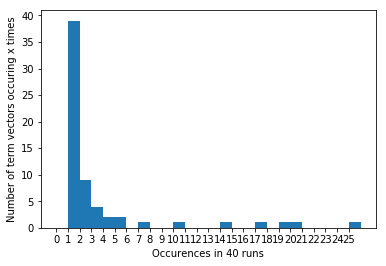

19 set(['summer', 'happy', 'smil'])
17 set(['art', 'artissim', 'contemporaryart'])
14 set(['beautiful', 'happy', 'smil'])
10 set(['natal', 'christmas', 'christmastre'])
26 set(['natal', 'christmas', 'xmas'])
20 set(['beautiful', 'summer', 'smil'])
7 set(['piemont', 'art', 'torino\\xe8lamiacitt'])


In [43]:
plt.figure()
plt.hist(occurences, bins=[i for i in xrange(max(occurences)+1)])
plt.xlabel('Occurences in 40 runs')
plt.xticks([i for i in xrange(max(occurences))])
plt.ylabel('Number of term vectors occuring x times')
plt.savefig('termvectors_sampling_5topics_hist.pdf')
plt.show()

for s in set_topics:
    if occurences[set_topics.index(s)]>6:
        print occurences[set_topics.index(s)], s


In [44]:
# Find the 10 most common topics in the sample.
common_topics=[]
occurences_sorted=sorted(occurences)[::-1]
while(True):
    o=occurences_sorted.pop(0)
    top=set_topics.pop(occurences.index(o))
    common_topics.append([o, top])
    occurences.pop(occurences.index(o))
    if len(common_topics)==10:
        break
common_topics
# common_topics keeps track of the 10 most common term vectors in the sampled NTF version.

[[26, {'christmas', 'natal', 'xmas'}],
 [20, {'beautiful', 'smil', 'summer'}],
 [19, {'happy', 'smil', 'summer'}],
 [17, {'art', 'artissim', 'contemporaryart'}],
 [14, {'beautiful', 'happy', 'smil'}],
 [10, {'christmas', 'christmastre', 'natal'}],
 [7, {'art', 'piemont', 'torino\\xe8lamiacitt'}],
 [5, {'art', 'night', 'piemont'}],
 [5, {'bestoftheday', 'happy', 'smil'}],
 [4, {'night', 'piemont', 'torino\\xe8lamiacitt'}]]

In [38]:
# Find the most degenerate words.
words_occ=dict()
for top in all_tv:
    for word in top:
        if word in words_occ.keys():
            words_occ[word]+=1
        else:
            words_occ[word]=1
for key in words_occ.keys():
    if words_occ[key]>5:
        print key, words_occ[key]

beautiful 45
summer 56
art 43
bell 9
bestoftheday 11
smil 77
artissim 20
christmas 43
happy 50
sempr 15
contemporaryart 17
christmastre 10
torino\xe8lamiacitt 22
natal 42
mol 11
piemont 34
night 24
xmas 26


In [95]:
all_tv=[]
n_topics=5
F=open('NMF_Topics_Def_5topics','r')
#F=open('NMF_Topics_Def','r')
for lines in F:
    if lines[0]=='[' and lines[1]=='u':
        T=lines.split(', ')
        T[0]= T[0][3:]
        T[-1]= T[-1][:-3]
        main_words=[t.replace("u'","") for t in T[0:3]]
        main_words=[t.replace("'","") for t in main_words]
        #all_tv is a list of all the term vectors.
        all_tv.append(set(main_words))     
set_topics=[]
occurences=[]

monthly=[]
NMF_TV=[]
for i in xrange(len(all_tv)):
    monthly.append(all_tv[i])
    if (i+1)%n_topics==0:
        NMF_TV.append(monthly)
        monthly=[]
all_tv2=np.copy(all_tv)
while all_tv:
    # Count the occurences for every term vectors(reduced to its 3 leading words)
    topic=all_tv.pop(0)
    if topic in set_topics:
        occurences[set_topics.index(topic)]+=1
    else:
        occurences.append(1)
        set_topics.append(topic)
set(occurences)

{1, 2, 3, 4, 5, 6, 7, 9, 10, 15}

In [96]:
#Look for the most degenerate words
words_occ=dict()
for top in list(all_tv2):
    for word in top:
        if word in words_occ.keys():
            words_occ[word]+=1
        else:
            words_occ[word]=1
            
words_deg=[]
for key in words_occ.keys():
    if words_occ[key]>5:
        words_deg.append([key, words_occ[key]])
from operator import itemgetter
sorted(words_deg,key=itemgetter(1))[::-1]

[['natur', 40],
 ['smil', 35],
 ['dinner', 35],
 ['music', 33],
 ['fashion', 31],
 ['sush', 31],
 ['night', 27],
 ['sempr', 27],
 ['tatto', 24],
 ['gym', 24],
 ['ink', 23],
 ['sky', 23],
 ['fitness', 22],
 ['party', 21],
 ['iphones', 21],
 ['happy', 20],
 ['piemont', 19],
 ['bestoftheday', 19],
 ['summer', 19],
 ['architectur', 18],
 ['pizz', 18],
 ['cut', 17],
 ['workout', 16],
 ['beautiful', 16],
 ['po', 16],
 ['giorn', 15],
 ['graz', 15],
 ['yummy', 15],
 ['buon', 14],
 ['sun', 14],
 ['autumn', 13],
 ['concert', 13],
 ['liv', 11],
 ['spring', 11],
 ['amic', 10],
 ['art', 10],
 ['inked', 10],
 ['winter', 9],
 ['bell', 9],
 ['day', 9],
 ['natal', 9],
 ['sunset', 8],
 ['snow', 8],
 ['piazz', 8],
 ['parc', 8],
 ['autunn', 8],
 ['girl', 8],
 ['torino\\xe8lamiacitt', 8],
 ['superg', 7],
 ['iphon', 7],
 ['christmas', 7],
 ['new', 7],
 ['tattoos', 7],
 ['photography', 7],
 ['prim', 7],
 ['self', 6],
 ['cas', 6],
 ['eat', 6],
 ['training', 6],
 ['good', 6],
 ['ciel', 6]]

In [98]:
Ratio=[]
for nmf in NMF_TV:
    monthly_ratio=0
    for n in nmf:
        if n in [e[1] for e in common_topics]:
            monthly_ratio+=1
    Ratio.append(monthly_ratio)

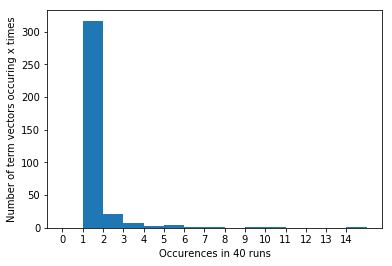

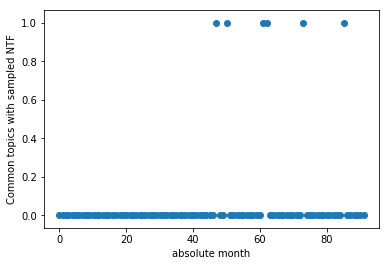

4 set(['river', 'murazz', 'po'])
6 set(['liv', 'music', 'concert'])
5 set(['autumn', 'autunn', 'natur'])
4 set(['cut', 'fashion', 'smil'])
5 set(['natur', 'piemont', 'architectur'])
15 set(['gym', 'workout', 'fitness'])
9 set(['sush', 'dinner', 'pizz'])
5 set(['tatuagg', 'tatto', 'ink'])
5 set(['training', 'gym', 'fitness'])
5 set(['graz', 'music', 'sempr'])
7 set(['tattoos', 'tatto', 'ink'])
10 set(['inked', 'tatto', 'ink'])


In [100]:
plt.figure()
plt.hist(occurences, bins=[i for i in xrange(max(occurences)+1)])
plt.xlabel('Occurences in 40 runs')
plt.xticks([i for i in xrange(max(occurences))])
plt.ylabel('Number of term vectors occuring x times')
plt.savefig('termvectors_NMFnoMon_5topics_hist.pdf')
plt.show()

plt.figure()
plt.scatter([i for i in xrange(len(NMF_TV))],Ratio)
plt.ylabel('Common topics with sampled NTF')
plt.xlabel('absolute month')
plt.savefig('termvectors_common_NMFnoMon_sample.pdf')
plt.show()
plt.close()

for s in set_topics:
    if occurences[set_topics.index(s)]>3:
        print occurences[set_topics.index(s)], s

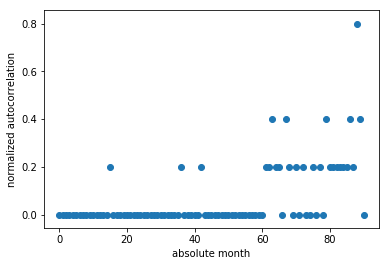

In [101]:
Ratio=[]
for i in xrange(len(NMF_TV)-1):
    monthly_ratio=0
    for n in NMF_TV[i]:
        if n in NMF_TV[i+1]:
            monthly_ratio+=.2
    Ratio.append(monthly_ratio)
    
plt.figure()
plt.scatter([i for i in xrange(len(NMF_TV)-1)],Ratio)
plt.xlabel('absolute month')
plt.ylabel('normalized autocorrelation')
plt.savefig('NMFnoMon_5topics_autocorrelation.pdf')
plt.show()

In [102]:
# Find the 10 most common topics in the sample.
common_topics_nmf=[]
occurences_sorted=sorted(occurences)[::-1]
while(True):
    o=occurences_sorted.pop(0)
    top=set_topics.pop(occurences.index(o))
    common_topics_nmf.append([o, top])
    occurences.pop(occurences.index(o))
    if len(common_topics_nmf)==10:
        break
common_topics_nmf
# common_topics keeps track of the 10 most common term vectors in the sampled NTF version.

[[15, {'fitness', 'gym', 'workout'}],
 [10, {'ink', 'inked', 'tatto'}],
 [9, {'dinner', 'pizz', 'sush'}],
 [7, {'ink', 'tatto', 'tattoos'}],
 [6, {'concert', 'liv', 'music'}],
 [5, {'autumn', 'autunn', 'natur'}],
 [5, {'architectur', 'natur', 'piemont'}],
 [5, {'ink', 'tatto', 'tatuagg'}],
 [5, {'fitness', 'gym', 'training'}],
 [5, {'graz', 'music', 'sempr'}]]

In [103]:
all_tv=[]
F=open('NMF_Topics_Def_Mon_5topics','r')
n_topics=5
#F=open('NMF_Topics_Def_Mon','r')
for lines in F:
    if lines[0]=='[' and lines[1]=='u':
        T=lines.split(', ')
        T[0]= T[0][3:]
        T[-1]= T[-1][:-3]
        main_words=[t.replace("u'","") for t in T[0:3]]
        main_words=[t.replace("'","") for t in main_words]
        all_tv.append(set(main_words))
set_topics=[]
occurences=[]

monthly=[]
NMF_TV_Mon=[]
for i in xrange(len(all_tv)):
    monthly.append(all_tv[i])
    if (i+1)%n_topics==0:
        NMF_TV_Mon.append(monthly)
        monthly=[]

while all_tv:
    topic=all_tv.pop(0)
    if topic in set_topics:
        occurences[set_topics.index(topic)]+=1
    else:
        occurences.append(1)
        set_topics.append(topic)
set(occurences)


{1, 2, 3, 4, 5, 7, 8, 10, 16}

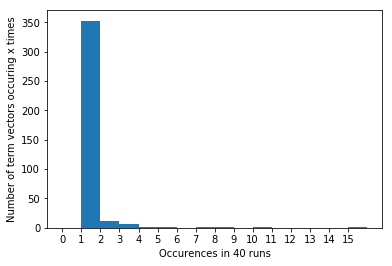

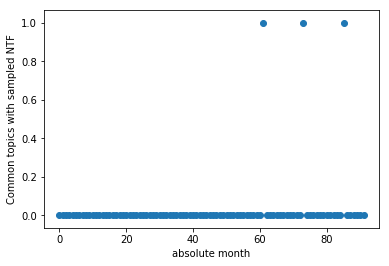

16 set(['gym', 'workout', 'fitness'])
8 set(['piemont', 'torino\\xe8lamiacitt', 'architectur'])
4 set(['sush', 'yummy', 'pizz'])
5 set(['tatuagg', 'tatto', 'ink'])
4 set(['party', 'cut', 'happy'])
8 set(['tattoos', 'tatto', 'ink'])
7 set(['training', 'gym', 'fitness'])
10 set(['inked', 'tatto', 'ink'])


In [105]:
Ratio=[]
for nmf in NMF_TV_Mon:
    monthly_ratio=0
    for n in nmf:
        if n in [e[1] for e in common_topics]:
            monthly_ratio+=1
    Ratio.append(monthly_ratio)

plt.figure()
plt.hist(occurences, bins=[i for i in xrange(max(occurences)+1)])
plt.xlabel('Occurences in 40 runs')
plt.xticks([i for i in xrange(max(occurences))])
plt.ylabel('Number of term vectors occuring x times')
plt.savefig('termvectors_NMF_5topics_hist.pdf')
plt.show()

plt.figure()
plt.scatter([i for i in xrange(len(NMF_TV_Mon))],Ratio)
plt.ylabel('Common topics with sampled NTF')
plt.xlabel('absolute month')
plt.savefig('termvectors_common_NMF_sample.pdf')
plt.show()
plt.close()

for s in set_topics:
    if occurences[set_topics.index(s)]>3:
        print occurences[set_topics.index(s)], s

In [106]:
# Find the 10 most common topics in the sample.
common_topics_nmf_mon=[]
occurences_sorted=sorted(occurences)[::-1]
while(True):
    o=occurences_sorted.pop(0)
    top=set_topics.pop(occurences.index(o))
    common_topics_nmf_mon.append([o, top])
    occurences.pop(occurences.index(o))
    if len(common_topics_nmf_mon)==10:
        break
common_topics_nmf_mon
# common_topics keeps track of the 10 most common term vectors in the sampled NTF version.

[[16, {'fitness', 'gym', 'workout'}],
 [10, {'ink', 'inked', 'tatto'}],
 [8, {'architectur', 'piemont', 'torino\\xe8lamiacitt'}],
 [8, {'ink', 'tatto', 'tattoos'}],
 [7, {'fitness', 'gym', 'training'}],
 [5, {'ink', 'tatto', 'tatuagg'}],
 [4, {'pizz', 'sush', 'yummy'}],
 [4, {'cut', 'happy', 'party'}],
 [3, {'bestoftheday', 'iphon', 'iphones'}],
 [3, {'murazz', 'po', 'river'}]]

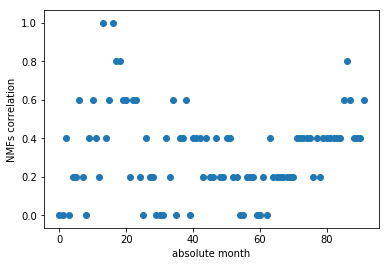

In [113]:
Ratio=[]
for i in xrange(len(NMF_TV)):
    monthly_ratio=0
    for n in NMF_TV[i]:
        if n in NMF_TV_Mon[i]:
            monthly_ratio+=.2
    Ratio.append(monthly_ratio)
    
plt.figure()
plt.scatter([i for i in xrange(len(NMF_TV))],Ratio)
plt.xlabel('absolute month')
plt.ylabel('NMFs correlation')
plt.savefig('NMF_NMFnoMon_correlation.pdf')
plt.show()

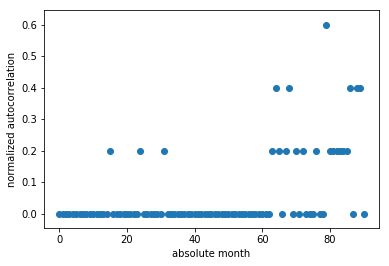

In [116]:
Ratio=[]
for i in xrange(len(NMF_TV_Mon)-1):
    monthly_ratio=0
    for n in NMF_TV_Mon[i]:
        if n in NMF_TV_Mon[i+1]:
            monthly_ratio+=.2
    Ratio.append(monthly_ratio)
    
plt.figure()
plt.scatter([i for i in xrange(len(NMF_TV_Mon)-1)],Ratio)
plt.xlabel('absolute month')
plt.ylabel('normalized autocorrelation')
plt.savefig('NMF_5topics_autocorrelation.pdf')
plt.show()

In [118]:
#Find the most degenerate words
words_occ=dict()
for top in set_topics:
    for word in top:
        if word in words_occ.keys():
            words_occ[word]+=1
        else:
            words_occ[word]=1
words_deg=[]
for key in words_occ.keys():
    if words_occ[key]>5:
        words_deg.append([key, words_occ[key]])
from operator import itemgetter
sorted(words_deg,key=itemgetter(1))[::-1]

[['happy', 27],
 ['sush', 24],
 ['giorn', 21],
 ['party', 19],
 ['piemont', 18],
 ['summer', 18],
 ['art', 17],
 ['bell', 17],
 ['bestoftheday', 17],
 ['graz', 16],
 ['po', 16],
 ['sun', 16],
 ['amic', 15],
 ['iphones', 15],
 ['yummy', 15],
 ['cut', 15],
 ['buon', 14],
 ['architectur', 14],
 ['autumn', 13],
 ['superg', 12],
 ['sunset', 12],
 ['girl', 11],
 ['valentin', 11],
 ['mol', 11],
 ['prim', 11],
 ['winter', 10],
 ['pizz', 10],
 ['spring', 10],
 ['day', 10],
 ['photography', 10],
 ['snow', 9],
 ['self', 9],
 ['parc', 9],
 ['iphon', 9],
 ['concert', 9],
 ['torino\\xe8lamiacitt', 8],
 ['fun', 8],
 ['amazing', 8],
 ['natal', 8],
 ['liv', 8],
 ['cas', 7],
 ['piazz', 7],
 ['basil', 7],
 ['christmas', 7],
 ['city', 7],
 ['relax', 7],
 ['autunn', 7],
 ['delicious', 6],
 ['lunc', 6],
 ['style', 6],
 ['new', 6],
 ['primaver', 6],
 ['halloween', 6],
 ['cen', 6],
 ['ciel', 6]]

In [120]:
import os
os.chdir('trials')

OSError: [Errno 2] No such file or directory: 'trials'

In [121]:
os.chdir('0')

In [131]:
TV=open('Term_Topics.txt','r')

In [132]:
Topics=TV.readlines()

In [141]:
Topics[0]

"0 [(u'pizz', 11.244176282146991), (u'dinner', 8.55167229399898), (u'yummy', 5.867320250004431), (u'cen', 5.015241883204096), (u'food', 4.918227832949334), (u'cak', 4.844887871342432), (u'delicious', 4.657626965707279), (u'sweet', 4.548279073221288)]\n"

In [147]:
term_vectors=[]
for t in Topics:
    e=[]
    for i in xrange(8):
        e.append(t.split(' ')[2*i+1].split("'")[1])
    term_vectors.append(e) 

In [160]:
for i in range(0,19):
    os.chdir(str(i))
    TV=open('Term_Topics.txt','r')
    Topics=TV.readlines()
    term_vectors=[]
    for t in Topics:
        e=[]
        for i in xrange(8):
            e.append(t.split(' ')[2*i+1].split("'")[1])
        term_vectors.append(e) 
    os.chdir('..')
    Glob=open('Term_Topics_glob.txt','a+')
    for vector in term_vectors:
        for term in vector:
            Glob.write(term+' ')
        Glob.write('\n')

In [169]:
F = open('Term_Topics_glob.txt','r')
#F = open('termvectors_sampling.txt','r')
all_tv=[]
for lines in F:
    T=lines.split(' ')
    main_words=[t.replace("'","") for t in main_words]
    all_tv.append(set(main_words))
F.close()

In [177]:
F = open('Term_Topics_glob.txt','r')
#F = open('termvectors_sampling.txt','r')
all_tv=[]
for lines in F:
    T=lines.split(' ')
    all_tv.append(T)
F.close()

termvectors_all=list(np.copy(all_tv))
set_topics=[]
occurences=[]

all_tv3=list(np.copy(all_tv))
while all_tv:
    topic=all_tv.pop(0)
    if topic in set_topics:
        occurences[set_topics.index(topic)]+=1
    else:
        occurences.append(1)
        set_topics.append(topic)
set(occurences)


{1, 2, 3, 5, 6, 7, 8, 9, 12, 14, 18}

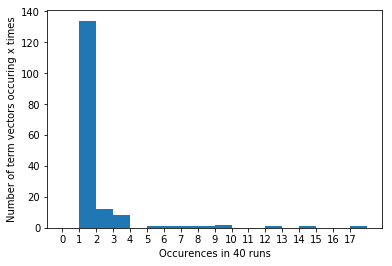

14 ['juventus', 'finoallafin', 'juv', 'forzajuv', 'football', 'serie', 'bianconer', 'championsleagu', '\n']
9 ['gym', 'fitness', 'workout', 'training', 'palestr', 'allen', 'sport', 'motivation', '\n']
12 ['murazz', 'po', 'river', 'granmadr', 'montedeicappuccin', 'night', 'fium', 'sunset', '\n']
8 ['eataly', 'gallery', 'fiat', 'pizz', 'past', 'lunc', 'win', 'cib', '\n']
18 ['tatto', 'ink', 'inked', 'tattoos', 'tatuagg', 'traditionaltatto', 'tattooed', 'art', '\n']
9 ['superg', 'basil', 'panoram', 'piemont', 'natur', 'landscap', 'view', 'sunset', '\n']
7 ['gym', 'fitness', 'workout', 'training', 'palestr', 'sport', 'allen', 'motivation', '\n']


In [173]:
plt.figure()
plt.hist(occurences, bins=[i for i in xrange(max(occurences)+1)])
plt.xlabel('Occurences in 40 runs')
plt.xticks([i for i in xrange(max(occurences))])
plt.ylabel('Number of term vectors occuring x times')
plt.savefig('termvectors_NTF_15topics_hist.pdf')
plt.show()

for s in set_topics:
    if occurences[set_topics.index(s)]>6:
        print occurences[set_topics.index(s)], s


In [174]:
# Find the 10 most common topics in the sample.
common_topics=[]
occurences_sorted=sorted(occurences)[::-1]
while(True):
    o=occurences_sorted.pop(0)
    top=set_topics.pop(occurences.index(o))
    common_topics.append([o, top])
    occurences.pop(occurences.index(o))
    if len(common_topics)==10:
        break
common_topics
# common_topics keeps track of the 10 most common term vectors in the sampled NTF version.

[[18,
  ['tatto',
   'ink',
   'inked',
   'tattoos',
   'tatuagg',
   'traditionaltatto',
   'tattooed',
   'art',
   '\n']],
 [14,
  ['juventus',
   'finoallafin',
   'juv',
   'forzajuv',
   'football',
   'serie',
   'bianconer',
   'championsleagu',
   '\n']],
 [12,
  ['murazz',
   'po',
   'river',
   'granmadr',
   'montedeicappuccin',
   'night',
   'fium',
   'sunset',
   '\n']],
 [9,
  ['gym',
   'fitness',
   'workout',
   'training',
   'palestr',
   'allen',
   'sport',
   'motivation',
   '\n']],
 [9,
  ['superg',
   'basil',
   'panoram',
   'piemont',
   'natur',
   'landscap',
   'view',
   'sunset',
   '\n']],
 [8,
  ['eataly', 'gallery', 'fiat', 'pizz', 'past', 'lunc', 'win', 'cib', '\n']],
 [7,
  ['gym',
   'fitness',
   'workout',
   'training',
   'palestr',
   'sport',
   'allen',
   'motivation',
   '\n']],
 [6,
  ['pol',
   'laure',
   'university',
   'graduation',
   'design',
   'stud',
   'univers',
   'day',
   '\n']],
 [5,
  ['architectur',
   'art',
   '

In [180]:
#Find the most degenerate words
words_occ=dict()
for top in all_tv3:
    for word in top:
        if word in words_occ.keys():
            words_occ[word]+=1
        else:
            words_occ[word]=1
words_deg=[]
for key in words_occ.keys():
    if words_occ[key]>5:
        words_deg.append([key, words_occ[key]])
from operator import itemgetter
sorted(words_deg,key=itemgetter(1))[::-1]

[['\n', 271],
 ['', 221],
 ['night', 54],
 ['piemont', 44],
 ['art', 43],
 ['sunset', 42],
 ['natur', 42],
 ['beautiful', 40],
 ['happy', 37],
 ['city', 33],
 ['pizz', 33],
 ['dinner', 31],
 ['lunc', 30],
 ['cen', 28],
 ['smil', 27],
 ['music', 27],
 ['sky', 25],
 ['relax', 24],
 ['po', 24],
 ['yummy', 24],
 ['landscap', 21],
 ['architectur', 21],
 ['amic', 20],
 ['party', 20],
 ['parc', 20],
 ['fiat', 20],
 ['sun', 19],
 ['park', 19],
 ['liv', 19],
 ['tatuagg', 18],
 ['panoram', 18],
 ['palestr', 18],
 ['allen', 18],
 ['photography', 18],
 ['fashion', 18],
 ['motivation', 18],
 ['sush', 18],
 ['design', 18],
 ['piazz', 18],
 ['gym', 18],
 ['basil', 18],
 ['traditionaltatto', 18],
 ['training', 18],
 ['tattoos', 18],
 ['ink', 18],
 ['concert', 18],
 ['superg', 18],
 ['tatto', 18],
 ['sport', 18],
 ['inked', 18],
 ['view', 18],
 ['fitness', 18],
 ['shopping', 18],
 ['workout', 18],
 ['tattooed', 18],
 ['autumn', 17],
 ['juventus', 17],
 ['delicious', 17],
 ['giorn', 17],
 ['river', 17],